# 0. Setup Paths

In [8]:
import os

In [9]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [10]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [11]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [12]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [6]:
# https://www.tensorflow.org/install/source_windows

In [6]:
if os.name=='nt':
    !pip install wget
    import wget

In [12]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    #!git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}
    !git clone https://github.com/tensorflow/models --depth 1 {paths['APIMODEL_PATH']}

In [14]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    #!apt-get install protobuf-compiler #for linux
    #!brew install protobuf#for MacOs/OSX
    #!cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=.
    !cd Tensorflow/models/research && /Users/rovansuresh/Desktop/ObjectDetection/TFODCourse/Tensorflow/protoc/bin/protoc object_detection/protos/*.proto --python_out=.
    !cd Tensorflow/models/research && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

Processing /Users/rovansuresh/Desktop/ObjectDetection/TFODCourse/Tensorflow/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Using cached avro-python3-1.10.2.tar.gz (38 kB)
  Using cached apache_beam-2.32.0-cp38-cp38-macosx_10_9_x86_64.whl (4.2 MB)
     |████████████████████████████████| 3.0 MB 3.2 MB/s eta 0:00:01
  Using cached matplotlib-3.4.3-cp38-cp38-macosx_10_9_x86_64.whl (7.2 MB)
  Using cached Cython-0.29.24-cp38-cp38-macosx_10_9_x86_64.whl (1.9 MB)
  Using cached contextlib2-21.6.0-py2.py3-none-any.whl (13 kB)
  Using cached tf_slim-1.1.0-py2.py3-none-any.whl (352 kB)
  Using cached pycocotools-2.0.2-cp38-cp38-macosx_

  Using cached Werkzeug-2.0.1-py3-none-any.whl (288 kB)
  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.1.1-py2.py3-none-any.whl (146 kB)
  Using cached dm_tree-0.1.6-cp38-cp38-macosx_10_14_x86_64.whl (95 kB)
  Using cached crcmod-1.7-cp38-cp38-macosx_10_9_x86_64.whl
  Using cached hdfs-2.6.0-py3-none-any.whl (33 kB)
  Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)
  Using cached fastavro-1.4.4-cp38-cp38-macosx_10_14_x86_64.whl (483 kB)
  Using cached pymongo-3.12.0-cp38-cp38-macosx_10_9_x86_64.whl (394 kB)
  Using cached dill-0.3.1.1-py3-none-any.whl
  Using cached pyarrow-4.0.1-cp38-cp38-macosx_10_13_x86_64.whl (15.7 MB)
  Using cached future-0.18.2.tar.gz (829 kB)
  Using cached orjson-3.6.3-cp38-cp38-macosx_10_9_x86_64.macosx_11_0_arm64.macosx_10_9_universal2.whl (434 kB)
  Using cached avro_python3-1.9.2.1-py3-none-any.whl
  Using cached docopt-0.6.2-py2.py3-n

In [15]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.8.8: /Users/rovansuresh/Desktop/ObjectDetection/tfod/bin/python
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-09-04 16:26:08.948912: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/rovansuresh/Desktop/ObjectDetection/tfod/lib/python3.8/site-packages/object_detection/builders/model_builder.py:1091: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Building experimental DeepMAC meta-arch.'
W0904 16:26:09.308681 4517400064 model_builder.py:1091] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.72s
I0904 16:26:09.663115 45

I0904 16:26:13.817918 4517400064 efficientnet_model.py:147] round_filter input=16 output=16
I0904 16:26:13.818037 4517400064 efficientnet_model.py:147] round_filter input=24 output=24
I0904 16:26:13.940411 4517400064 efficientnet_model.py:147] round_filter input=24 output=24
I0904 16:26:13.940551 4517400064 efficientnet_model.py:147] round_filter input=40 output=40
I0904 16:26:14.044593 4517400064 efficientnet_model.py:147] round_filter input=40 output=40
I0904 16:26:14.044689 4517400064 efficientnet_model.py:147] round_filter input=80 output=80
I0904 16:26:14.196439 4517400064 efficientnet_model.py:147] round_filter input=80 output=80
I0904 16:26:14.196587 4517400064 efficientnet_model.py:147] round_filter input=112 output=112
I0904 16:26:14.386626 4517400064 efficientnet_model.py:147] round_filter input=112 output=112
I0904 16:26:14.386729 4517400064 efficientnet_model.py:147] round_filter input=192 output=192
I0904 16:26:14.654152 4517400064 efficientnet_model.py:147] round_filter i

I0904 16:26:17.707441 4517400064 efficientnet_model.py:147] round_filter input=192 output=208
I0904 16:26:17.707569 4517400064 efficientnet_model.py:147] round_filter input=320 output=352
I0904 16:26:17.872912 4517400064 efficientnet_model.py:147] round_filter input=1280 output=1408
I0904 16:26:17.914002 4517400064 efficientnet_model.py:458] Building model efficientnet with params ModelConfig(width_coefficient=1.1, depth_coefficient=1.2, resolution=260, dropout_rate=0.3, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=16, output_filters=24, kernel_size=3, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=24, output_filters=40, kernel_size=5, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=Fals

I0904 16:26:23.552338 4517400064 ssd_efficientnet_bifpn_feature_extractor.py:142] EfficientDet EfficientNet backbone version: efficientnet-b5
I0904 16:26:23.552459 4517400064 ssd_efficientnet_bifpn_feature_extractor.py:144] EfficientDet BiFPN num filters: 288
I0904 16:26:23.552517 4517400064 ssd_efficientnet_bifpn_feature_extractor.py:145] EfficientDet BiFPN num iterations: 7
I0904 16:26:23.554039 4517400064 efficientnet_model.py:147] round_filter input=32 output=48
I0904 16:26:23.566542 4517400064 efficientnet_model.py:147] round_filter input=32 output=48
I0904 16:26:23.566649 4517400064 efficientnet_model.py:147] round_filter input=16 output=24
I0904 16:26:23.713245 4517400064 efficientnet_model.py:147] round_filter input=16 output=24
I0904 16:26:23.713366 4517400064 efficientnet_model.py:147] round_filter input=24 output=40
I0904 16:26:24.099703 4517400064 efficientnet_model.py:147] round_filter input=24 output=40
I0904 16:26:24.099952 4517400064 efficientnet_model.py:147] round_fil

I0904 16:26:31.008074 4517400064 efficientnet_model.py:147] round_filter input=24 output=48
I0904 16:26:31.008195 4517400064 efficientnet_model.py:147] round_filter input=40 output=80
I0904 16:26:31.447409 4517400064 efficientnet_model.py:147] round_filter input=40 output=80
I0904 16:26:31.447512 4517400064 efficientnet_model.py:147] round_filter input=80 output=160
I0904 16:26:32.122246 4517400064 efficientnet_model.py:147] round_filter input=80 output=160
I0904 16:26:32.122368 4517400064 efficientnet_model.py:147] round_filter input=112 output=224
I0904 16:26:32.848803 4517400064 efficientnet_model.py:147] round_filter input=112 output=224
I0904 16:26:32.848917 4517400064 efficientnet_model.py:147] round_filter input=192 output=384
I0904 16:26:33.972252 4517400064 efficientnet_model.py:147] round_filter input=192 output=384
I0904 16:26:33.972346 4517400064 efficientnet_model.py:147] round_filter input=320 output=640
I0904 16:26:34.365522 4517400064 efficientnet_model.py:147] round_fi

In [15]:
!pip install tensorflow --upgrade

  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached grpcio-1.34.1-cp37-cp37m-win_amd64.whl (2.9 MB)
  Using cached h5py-3.1.0-cp37-cp37m-win_amd64.whl (2.7 MB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard-2.4.1-py3-none-any.whl (10.6 MB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached tf_estimator_nightly-2.5.0.dev2021032501-py2.py3-none-any.whl (462 kB)
  Using cached wrapt-1.12.1-cp37-cp37m-win_amd64.whl
  Using cached cached_property-1.5.2-py2.py3-none-any.whl (7.6 kB)
  Using cached google_auth_oauthlib-0.4.4-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.28.0 requires crcmod<2.0,>=1.7, which is not installed.
apache-beam 2.28.0 requires dill<0.3.2,>=0.3.1.1, which is not installed.
apache-beam 2.28.0 requires fastavro<2,>=0.21.4, which is not installed.
apache-beam 2.28.0 requires future<1.0.0,>=0.18.2, which is not installed.
apache-beam 2.28.0 requires hdfs<3.0.0,>=2.1.0, which is not installed.
apache-beam 2.28.0 requires httplib2<0.18.0,>=0.8, which is not installed.
apache-beam 2.28.0 requires mock<3.0.0,>=1.0.1, which is not installed.
tensorflow-datasets 4.2.0 requires attrs>=18.1.0, which is not installed.
tensorflow-datasets 4.2.0 requires dill, which is not installed.
tensorflow-datasets 4.2.0 requires future, which is not installed.
tensorflow-datasets 4.2.0 requires importlib-resources, which is not installed.
tensorflow-datasets 4.2.0 re

In [5]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

  Using cached protobuf-3.17.3-cp38-cp38-macosx_10_9_x86_64.whl (1.0 MB)
     |████████████████████████████████| 12.4 MB 53 kB/s eta 0:00:013
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.3.2-cp38-cp38-macosx_10_9_x86_64.whl (61 kB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)


In [11]:
import object_detection

In [18]:
!pip list

Package                       Version             Location
----------------------------- ------------------- --------------------------------------------------------
absl-py                       0.12.0
apache-beam                   2.28.0
astunparse                    1.6.3
avro-python3                  1.10.2
backcall                      0.2.0
cached-property               1.5.2
cachetools                    4.2.1
certifi                       2020.12.5
chardet                       4.0.0
colorama                      0.4.4
contextlib2                   0.6.0.post1
cycler                        0.10.0
cython                        3.0a6
dataclasses                   0.8
decorator                     5.0.3
flatbuffers                   1.12
gast                          0.4.0
gin-config                    0.4.0
google-api-python-client      2.1.0
google-auth                   1.28.0
google-auth-oauthlib          0.4.4
google-cloud-bigquery         2.13.1
google-pasta                 

In [18]:
if os.name =='posix':
    !wget{PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

zsh:1: no such file or directory: http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
mv: rename ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz to Tensorflow/workspace/pre-trained-models/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz: No such file or directory
tar: Error opening archive: Failed to open 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'


# 2. Create Label Map

In [7]:
labels = [{'name':'ThumbsUp', 'id':1}, {'name':'ThumbsDown', 'id':2}, {'name':'ThankYou', 'id':3}, {'name':'LiveLong', 'id':4}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [ ]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [21]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

Cloning into 'Tensorflow/scripts'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 1 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [22]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: Tensorflow/workspace/annotations/test.record


# 4. Copy Model Config to Training Folder

In [23]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# 5. Update Config For Transfer Learning

In [4]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [5]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

NameError: name 'files' is not defined

In [27]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [28]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [29]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [30]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [35]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [36]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [37]:
print(command)

#mac
#python /Users/rovansuresh/Desktop/ObjectDetection/TFODCourse/Tensorflow/models/research/object_detection/model_main_tf2.py--model_dir=Tensorflow/workspace/models/my_ssd_mobnet
#--pipeline_config_path=/Users/rovansuresh/Desktop/ObjectDetection/TFODCourse/Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=2000

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=2000


In [32]:
!{command}

# 7. Evaluate the Model

In [38]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [39]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet


In [22]:
!{command}

^C


# 8. Load Train Model From Checkpoint

In [14]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [15]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

2021-09-07 16:06:47.422322: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 9. Detect from an Image

In [16]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [17]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [18]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'livelong.f3180158-0d72-11ec-a82a-3e22fb78a34c.jpg')

In [18]:
IMAGE_PATH

'Tensorflow/workspace/images/test/livelong.f3180158-0d72-11ec-a82a-3e22fb78a34c.jpg'

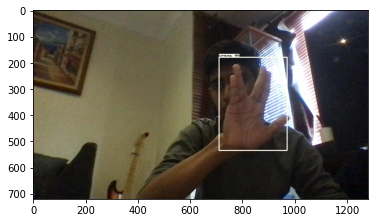

In [19]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Real Time Detections from your Webcam

In [ ]:
!pip uninstall opencv-python-headless -y

In [ ]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

2021-09-07 16:07:10.727052: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


# Last. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')